> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description
> This data set extracted from The movie database 
intially having 21 columns and 10866 rows
including movies from 1960 till 2015
columns are:
>0. id : databse id : unique id for each entry
1. imdb_id: international movie database id
2. popularity: popularity score range ~0:33 _some values may be outliers_
3. budget
4. revenue
5. original_title
6. cast
7. homepage: movie website
8. director
9. tagline: seems like a slogan
10. keywords
11. overview: summary 
12. runtime
13. genres
14. production_companies
15. release_date
16. vote_count
17. vote_average
18. release_year
19. budget_adj: budget with inflation
20. revenue_adj: revnue with inflation


## Main Questions
>### What genre has the most number of movies?
>### What are the most popular genre?
>### What are the biggest production companies?
>### How mush thoes comban gained?

## Limitations
However the dataset has 10866 entry it has: 
1. 1 duplicated row 
2. 1600 row has null values 
3. 7 rows has movies with zero run time which give nonse 
4. 4982 (more than the half) row has 0 in budget or revenue
But still 4000 movie gives a great indications to answer the four stated questions

In [93]:
# import useful packages and load dataset
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 
%matplotlib inline
df = pd.read_csv('tmdb.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [94]:
#first look
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [95]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### data set has 10866 rows
> homepage, tagline has alot of nulls


#### change release_date to date  <a href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">[1]</a>

In [96]:
#change release_date to date 
df.release_date = pd.to_datetime(df['release_date'])
df['release_month'] = pd.to_datetime(df['release_date']).dt.month


1. Remove un useful columns for this investigation
2. Id is enough so no need for imdb id
3. Hompage is not useful same with tagline 
4. Keywords are more represintive than review for the sake of analysis

In [97]:

df.drop(labels = ['imdb_id','homepage','tagline','overview'], axis= 1,inplace = True)


### Data Visualization 

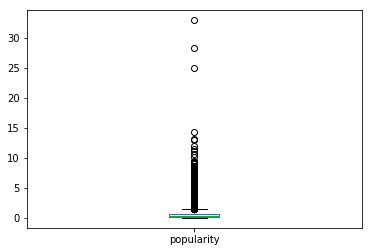

In [98]:
df.popularity.plot(kind='box');

In [99]:
#after checking thoes movies are really popular seems like popularity above 10 is not oulayers
df.query('popularity > 10')[:5]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,11


In [100]:
#extract numeric columns
#added [1:] to exclude id
numeric_col = df.dtypes[df.dtypes != 'object'].index[1:]
numeric_col

Index(['popularity', 'budget', 'revenue', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'release_month'],
      dtype='object')

plot of each feature aginst other features to emphasize the corelations


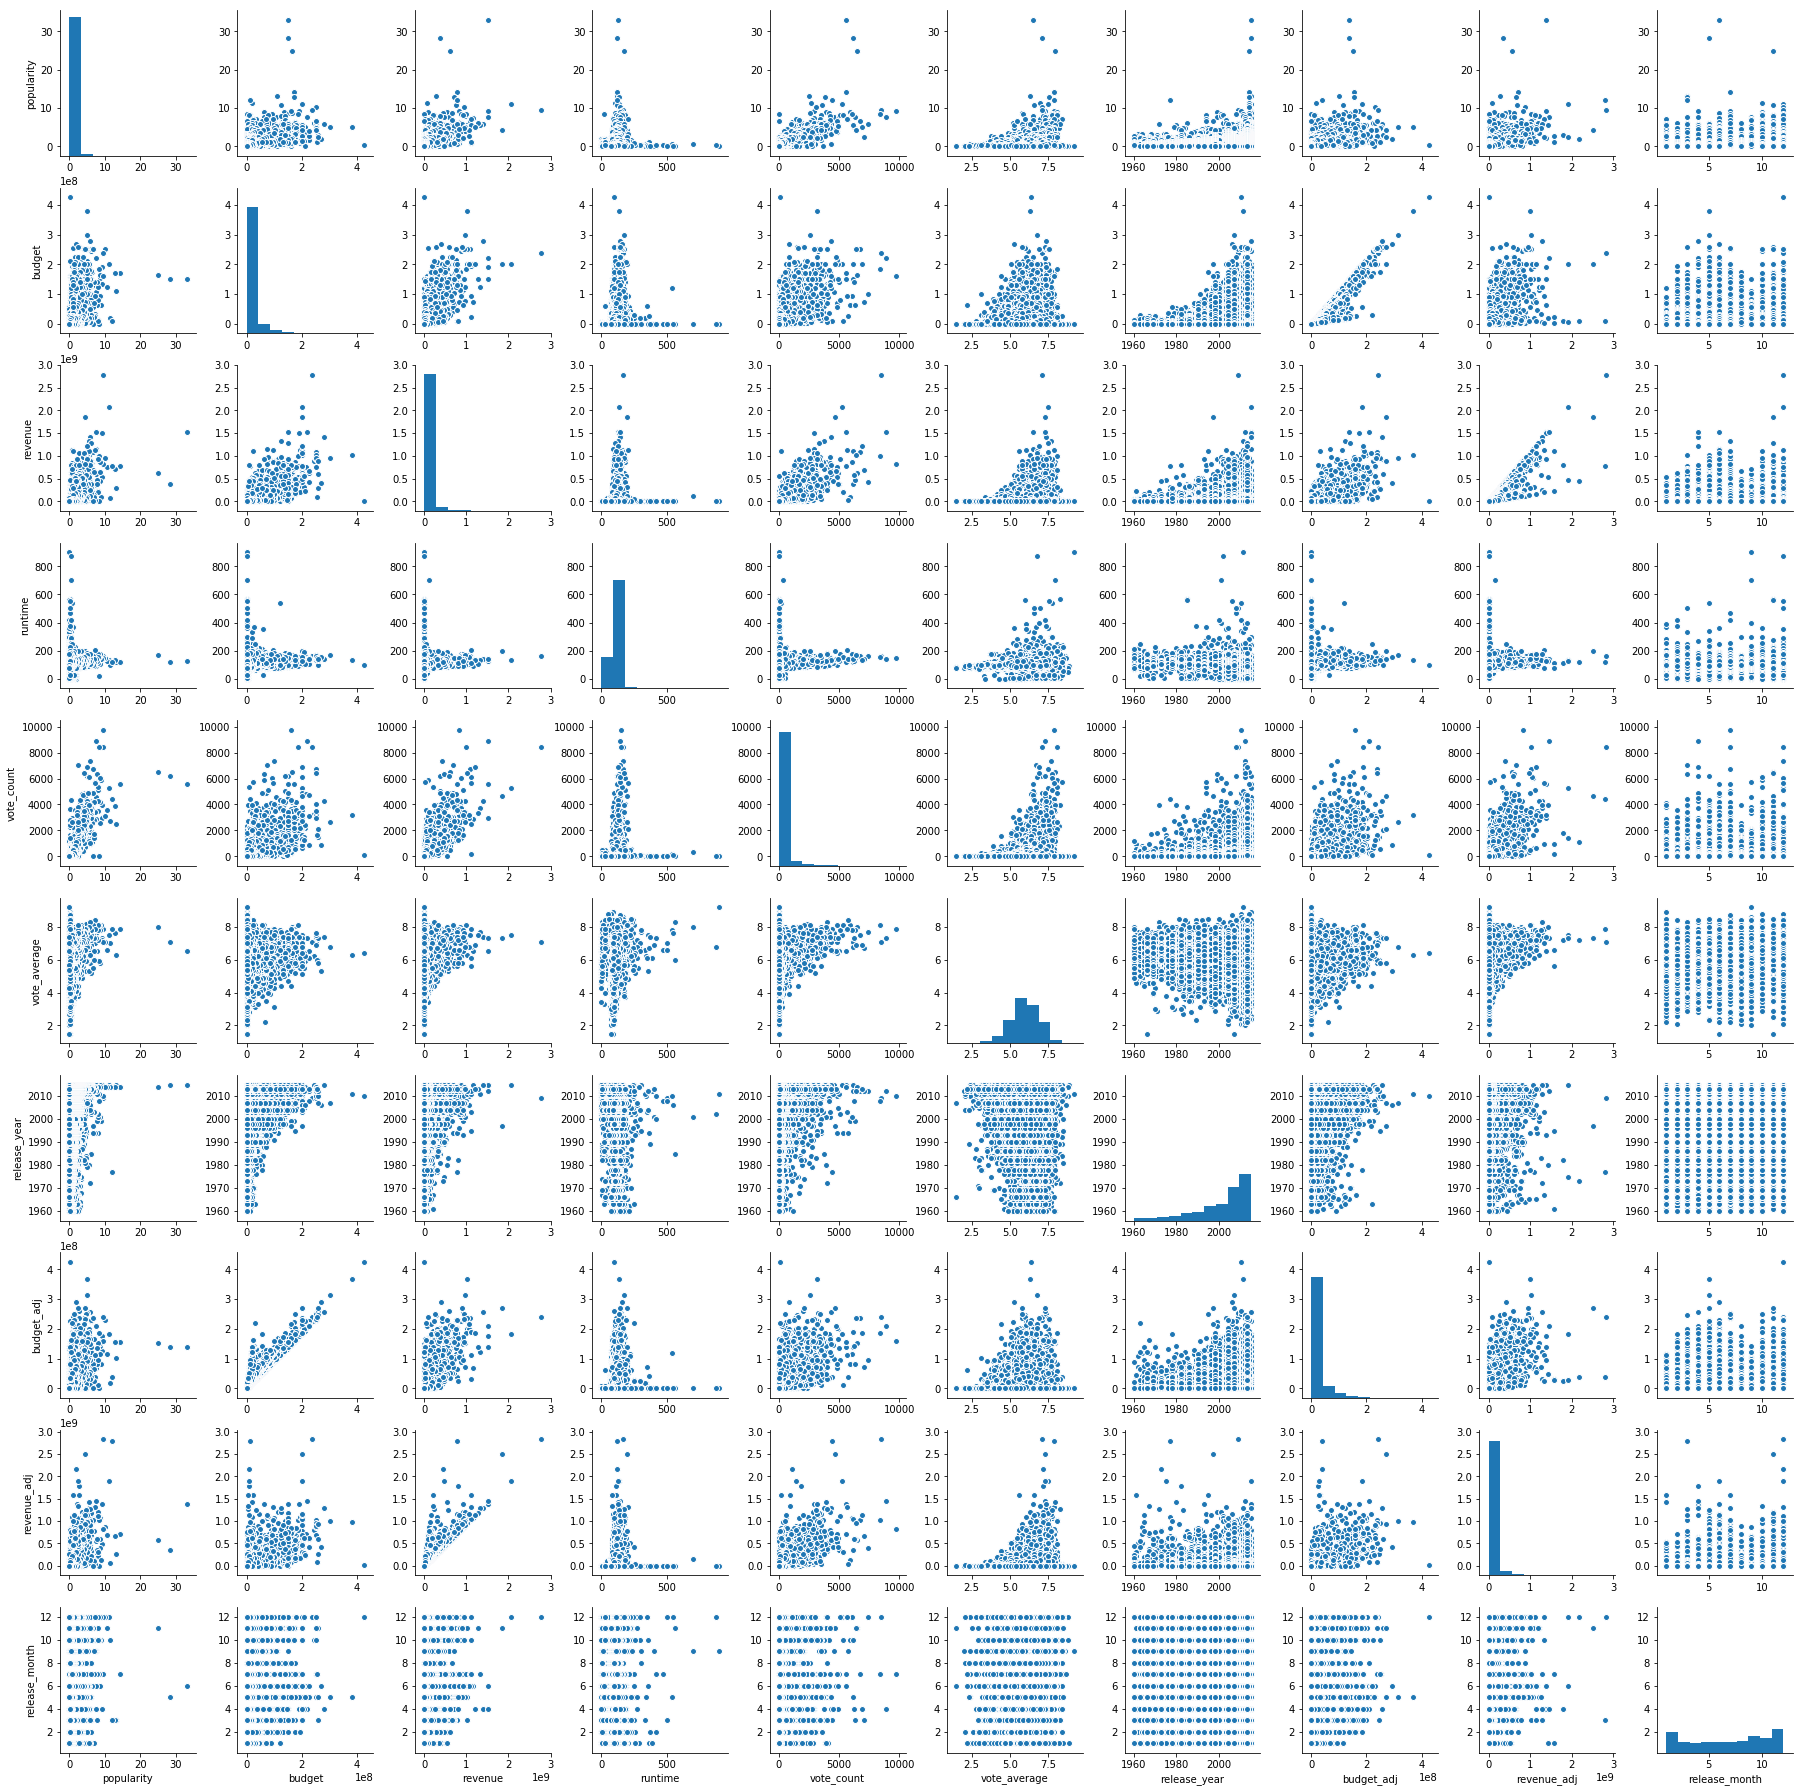

In [101]:
sns.pairplot(df[numeric_col],dropna=True );
print("plot of each feature aginst other features to emphasize the corelations")

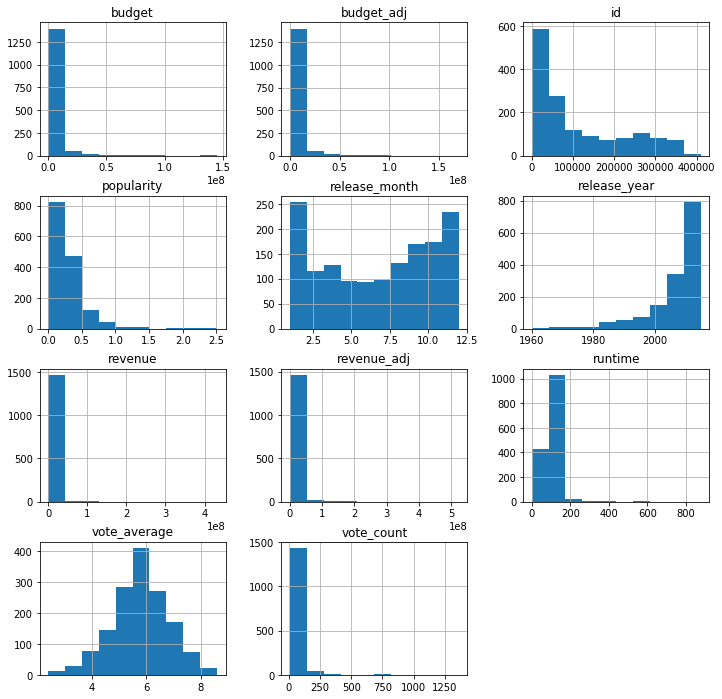

In [102]:
df[df['keywords'].isnull()].hist(figsize=(12,12));


### More observations from visualizations <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">[2]</a>
1. populartiy seems to have weak inverse corelation with runtime
2. all data are skewed except average count 
3. long movies is less popular and has les revenue in general 
4. movies are likely to be puplished in jan and december (around holidays)
5. investigation in movies industr are increasing ever year
6. vote count and popularity  are corelated
7. revenue and budget has string corelation
8. NaNs in keywords more likely in new movies but we can say it is not biased as new movies are more than old ones 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [103]:
#number of duplicated rows
df.duplicated().sum()

1

In [104]:
#drop duplicated
df.drop_duplicates(inplace = True)
df.shape

(10865, 18)

In [105]:
#drop nulls 
df.dropna(inplace = True)
df.shape

(8666, 18)

In [106]:
#check for zero values
for i in numeric_col:
    zeros = df[df[i] == 0].shape[0]
    print(f"number of {i} equal zero = {zeros}")

number of popularity equal zero = 0
number of budget equal zero = 3940
number of revenue equal zero = 4130
number of runtime equal zero = 7
number of release_date equal zero = 0
number of vote_count equal zero = 0
number of vote_average equal zero = 0
number of release_year equal zero = 0
number of budget_adj equal zero = 3940
number of revenue_adj equal zero = 4130
number of release_month equal zero = 0


**There are ~4000 movie with zero budget**
>this is huge number to be deleted so I will keep two versions one with zeros in budgets and one without to use each one in its appropriate palce

In [107]:
#remove movies with rutime = 0
df = df[df.runtime != 0]
df.shape

(8659, 18)

In [108]:
print (f"""Number of  movies with no budget or revnue {df.query('revenue == 0 | budget == 0').shape[0] }
Number of  movies with no budget_adj or revnue_adj {df.query('revenue_adj == 0 | budget_adj == 0').shape[0]}
       """
      )


Number of  movies with no budget or revnue 4982
Number of  movies with no budget_adj or revnue_adj 4982
       


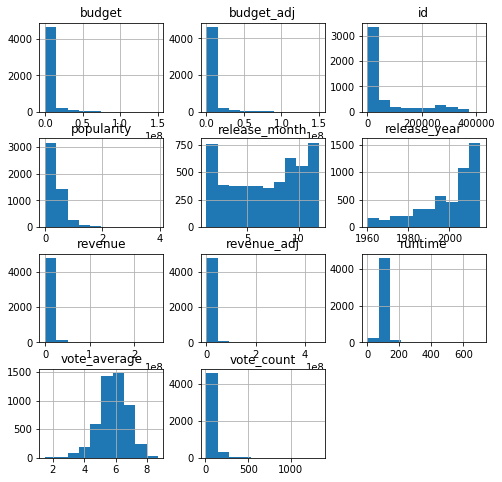

In [109]:
df.query('revenue == 0 | budget == 0 ').hist(figsize=(8,8));


In [110]:
#create dataframe with no zero budget or revnue 
df_noZero = df.query('revenue != 0 & budget != 0')
df_noZero.shape[0]

3677

In [111]:
#check for zero values
for i in numeric_col:
    zeros = df_noZero[df_noZero[i] == 0].shape[0]
    print(f"number of {i} equal zero = {zeros}")

number of popularity equal zero = 0
number of budget equal zero = 0
number of revenue equal zero = 0
number of runtime equal zero = 0
number of release_date equal zero = 0
number of vote_count equal zero = 0
number of vote_average equal zero = 0
number of release_year equal zero = 0
number of budget_adj equal zero = 0
number of revenue_adj equal zero = 0
number of release_month equal zero = 0


### for more consistent results let's depend only on adj budget and revenue


In [112]:
df_noZero = df_noZero.drop(labels = ['revenue','budget'], axis= 1)
df = df.drop(labels = ['revenue','budget'], axis= 1)


### create cloumn presents the profits

In [113]:
df_noZero['profit'] = df_noZero['revenue_adj']-df_noZero['budget_adj']
df_noZero.tail()

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit
10822,396,0.670274,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08,6,1.762585e+08
10828,5780,0.402730,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07,7,6.718015e+07
10829,6644,0.395668,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07,12,9.049166e+06
10835,5923,0.299911,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,12,5.374412e+07
10848,2161,0.207257,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07,8,4.625353e+07


In [114]:
numeric_col = df_noZero.dtypes[df_noZero.dtypes != 'object'].index[1:]
numeric_col

Index(['popularity', 'runtime', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'release_month', 'profit'],
      dtype='object')

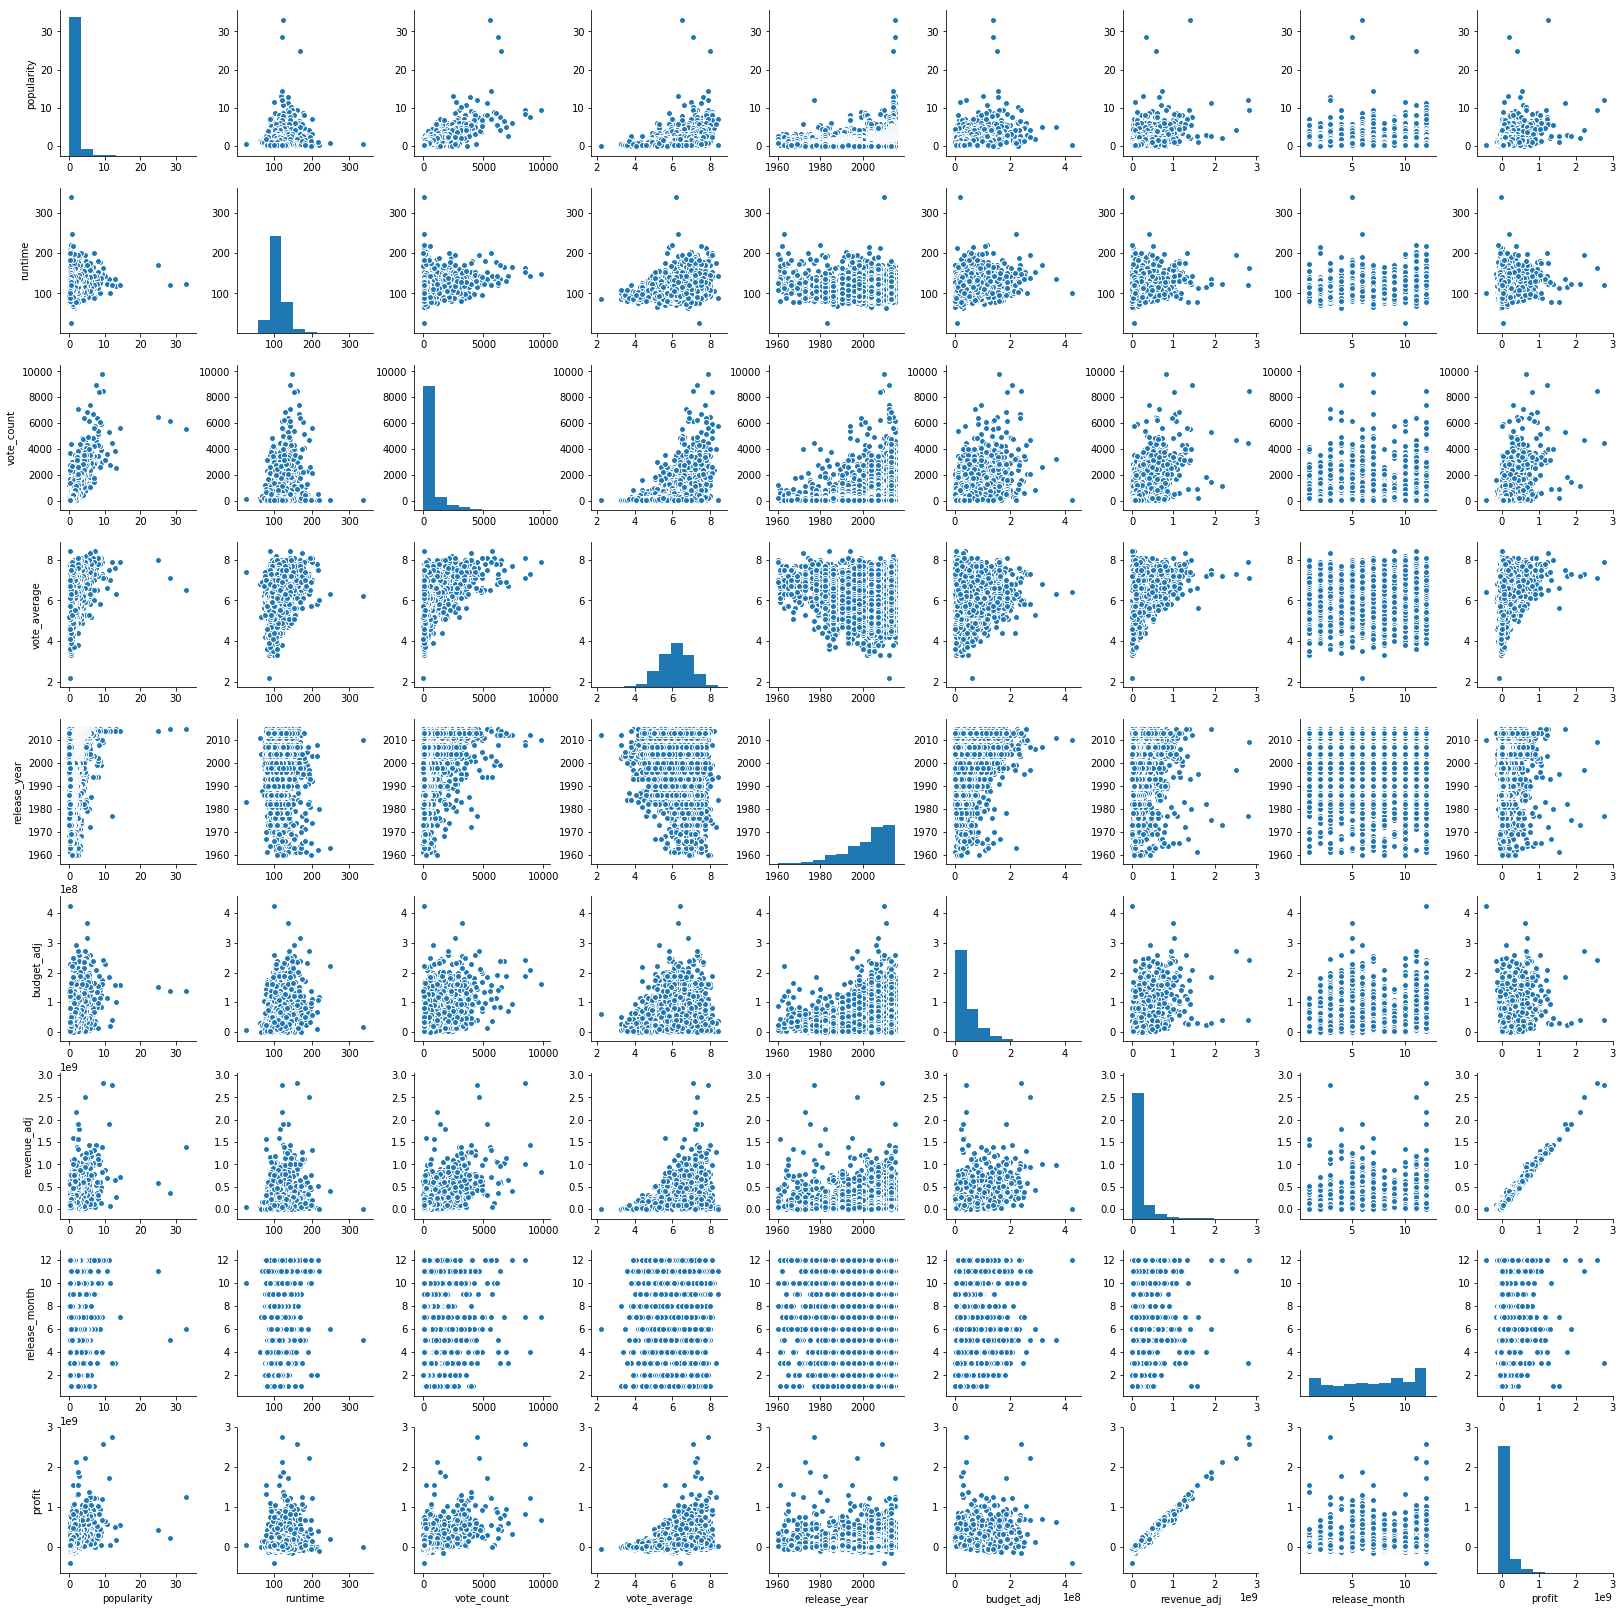

In [115]:
#visualize data again but after cleaning
sns.pairplot(df_noZero[numeric_col],dropna=True );

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What Genres are more popular and sucessful?
Answer of this question help producers to predict which genere is likely to get more sucess

In [116]:
#create df for generes only
genres = df_noZero['genres'].str[0:].str.split('|',expand = True)
genres['id'] = df_noZero['id']
genres.head()

,0,1,2,3,4,id
0,Action,Adventure,Science Fiction,Thriller,None,135397
1,Action,Adventure,Science Fiction,Thriller,None,76341
2,Adventure,Science Fiction,Thriller,None,None,262500
3,Action,Adventure,Science Fiction,Fantasy,None,140607
4,Action,Crime,Thriller,None,None,168259


In [117]:
#melt columns in one
genres = pd.melt(genres,id_vars = 'id',value_name = 'geners').drop(labels = 'variable',axis = 1)
genres.head()


,id,geners
0,135397,Action
1,76341,Action
2,262500,Adventure
3,140607,Action
4,168259,Action



#### What are different genres exist?

In [118]:
print("Number of genres")
print(len(genres['geners'].unique()))
print("\nGenres:")

for genre in genres['geners'].unique():
    print(genre)


Number of genres
21

Genres:
Action
Adventure
Western
Science Fiction
Drama
Family
Comedy
Crime
Romance
War
Thriller
Fantasy
History
Mystery
Animation
Horror
Music
Documentary
TV Movie
None
Foreign


### most of the movies are made in which genre?

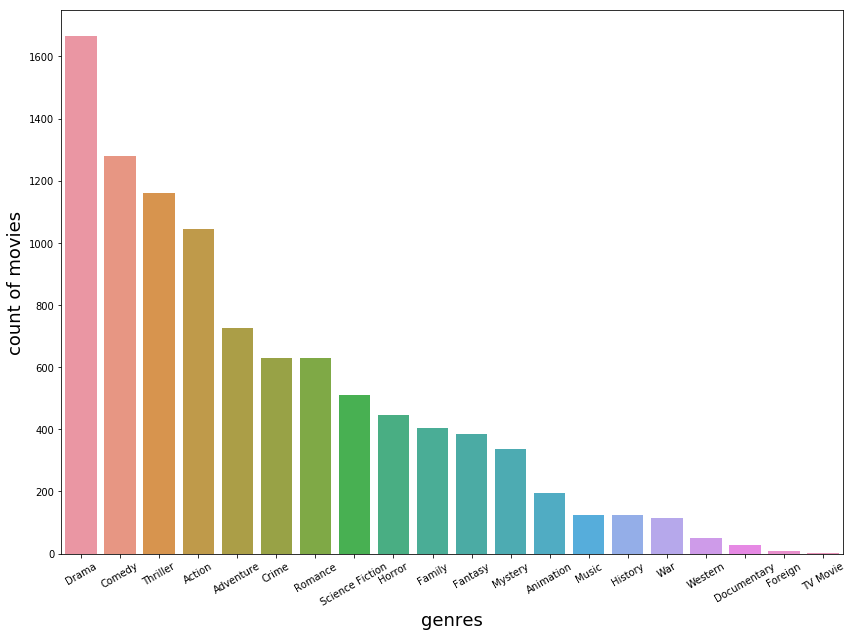

In [119]:
plt.pyplot.figure(figsize = (14,10));
sns.countplot(genres['geners'],order = genres
              ['geners'].value_counts().index);
plt.pyplot.xlabel('genres',fontsize=18)
plt.pyplot.ylabel('count of movies',fontsize=18)
plt.pyplot.xticks(rotation = 30,fontsize = 10);


#### Most produced movies are drama or comedy

### What are the most popular genre <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html">[4]</a>

In [120]:
df_gen = pd.merge(df_noZero,genres,on  = 'id')
df_gen.shape

(18385, 18)

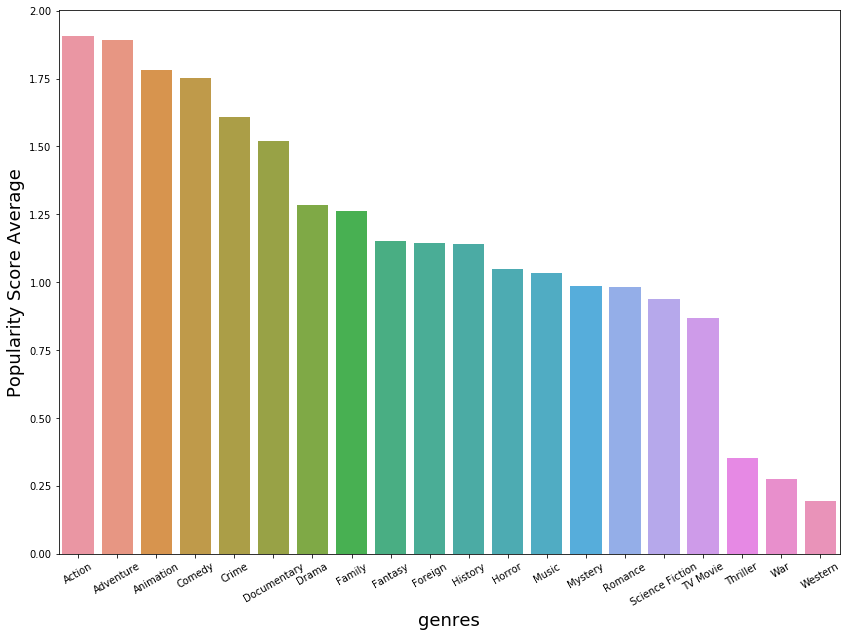

In [121]:
plt.pyplot.figure(figsize = (14,10));

x_axis = df_gen.groupby('geners').mean()['popularity'].index
y_axis = df_gen.groupby('geners').mean()['popularity'].sort_values(ascending = False).values

sns.barplot(x = x_axis, y = y_axis);

plt.pyplot.xlabel('genres',fontsize=18)
plt.pyplot.ylabel('Popularity Score Average',fontsize=18)
plt.pyplot.xticks(rotation = 30,fontsize = 10);


### Most popular movies are 
>1. Action
2. Adventure
3. Animation
4. Comedy

### What are the most sucessful production companies

In [122]:
#create df for generes
prod = df_noZero['production_companies'].str[0:].str.split('|',expand = True)
prod['id'] = df_noZero['id']


In [123]:
#melt columns in one
prod = pd.melt(prod,id_vars = 'id',value_name = 'production_companies').drop(labels = 'variable',axis = 1)
prod.head()

,id,production_companies
0,135397,Universal Studios
1,76341,Village Roadshow Pictures
2,262500,Summit Entertainment
3,140607,Lucasfilm
4,168259,Universal Pictures


In [124]:
print("Number of production_companies")
print(len(prod['production_companies'].unique()))

Number of production_companies
3152


In [125]:
#### The Most 20 productive companies 

Text(0,0.5,'count of movies')

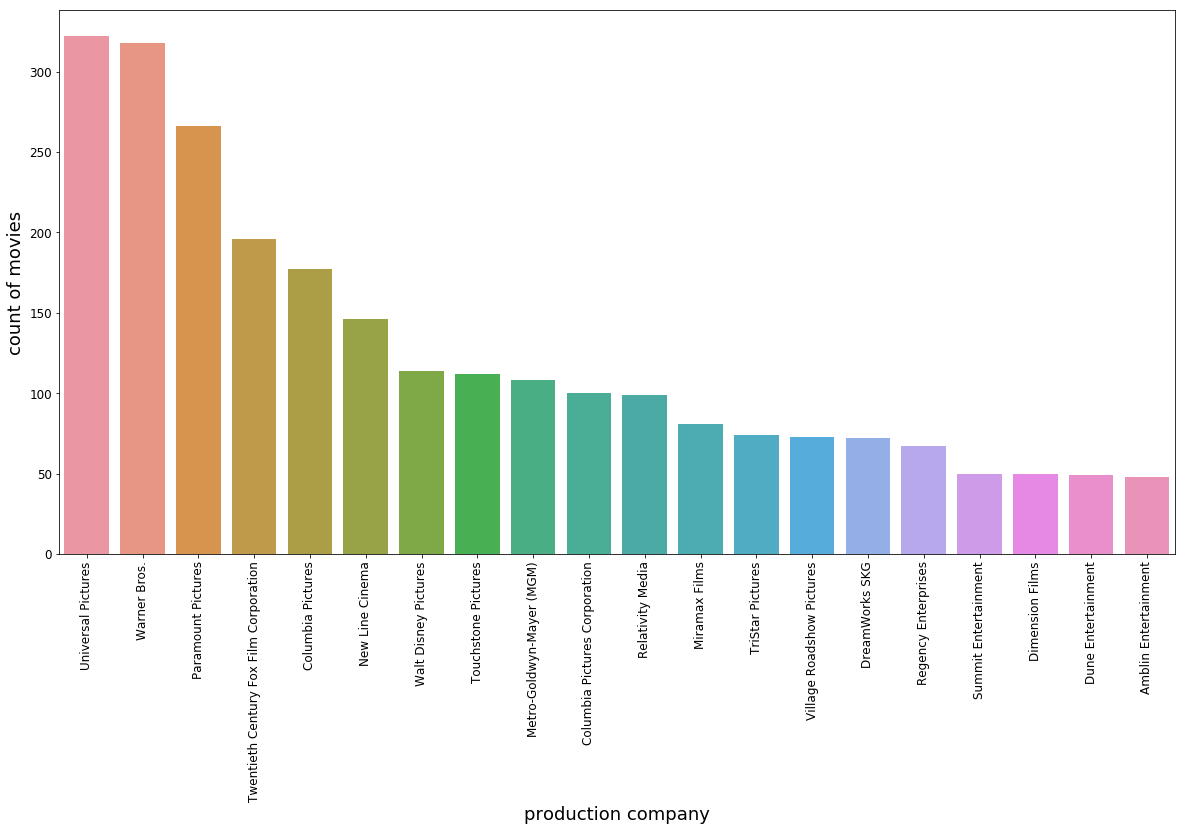

In [126]:
plt.pyplot.figure(figsize = (20,10));
sns.countplot(prod['production_companies'],order = prod['production_companies'].value_counts()[:20].index); 
plt.pyplot.xticks(rotation = 90,fontsize = 12);
plt.pyplot.yticks(fontsize = 12);

plt.pyplot.xlabel('production company',fontsize=18)
plt.pyplot.ylabel('count of movies',fontsize=18)


In [127]:
df_prod = pd.merge(df_noZero,prod,on  = 'id')
df_prod.head(2)

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies_x,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit,production_companies_y
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Universal Studios
1,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.254446e+09,Amblin Entertainment


Text(0,0.5,'Estimated earned profits in 10 billions')

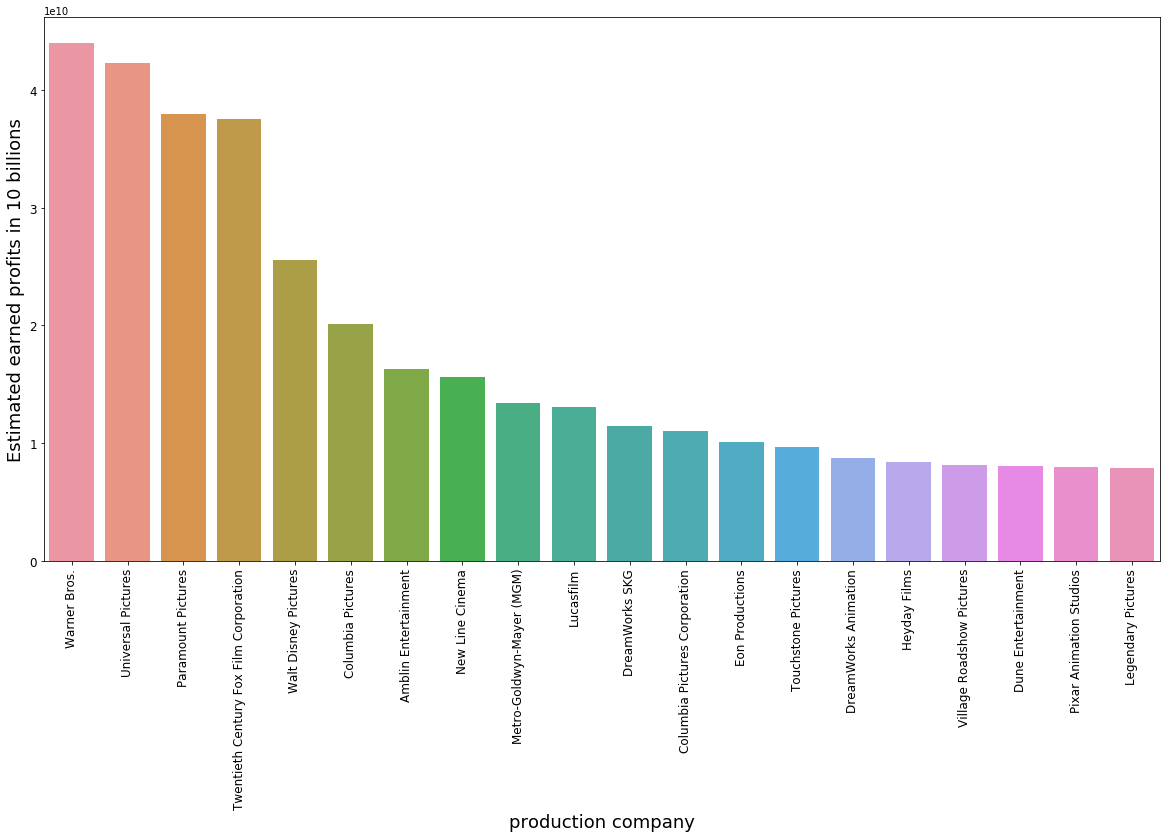

In [128]:
plt.pyplot.figure(figsize = (20,10));

x_axis = df_prod.groupby('production_companies_y').sum()['profit'].sort_values(ascending = False)[:20].index
y_axis = df_prod.groupby('production_companies_y').sum()['profit'].sort_values(ascending = False)[:20].values

sns.barplot(x = x_axis, 
            y = y_axis);
plt.pyplot.xticks(rotation = 90,fontsize = 12);
plt.pyplot.yticks(fontsize = 12);


plt.pyplot.xlabel('production company',fontsize=18)
plt.pyplot.ylabel('Estimated earned profits in 10 billions',fontsize=18)


<a id='conclusions'></a>
## Conclusions

> #### 1. Most movies are under genres are: 
    1. Drama
    2. Comedy
    3. Thriller
    4. Action
    5. Adventure

> #### 2. Most popular genres are:
1. Action
2. Adventure
3. Animation
4. Comedy
5. Crime

#### **Producers should invest more in thoses genres**

> #### 3. Most productive companies are:
1. Universal Pictures
2. Warner Bros
3. Twentieth Century Fox Film Corporation
4. Paranormal Pictures
5. Colombia Pictures

> #### 4. Most combanies gained  gross profits
1. Warner Bros
2. Universal Pictures
3. Paranormal Pictures
4. Twentieth Century Fox Film Corporation
5. Walt Disney

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0